# Importing all the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.data as pdata
import plotly.graph_objects as go
import pandas as pd
import ssl

ssl._create_default_https_context = ssl._create_unverified_context



sns.set_style('darkgrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (9, 5)
plt.rcParams['figure.facecolor'] = '#00000000'
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

C:\Users\Legion\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


# Importing the dataset, Cleaning & Exploring the dataset


In [2]:
df = pd.read_csv('hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
df.shape

(119390, 32)

In [4]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'agent', 'company', 'days_in_waiting_list', 'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status', 'reservation_status_date'], dtype='object')

In [5]:
df.meal.unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
df.reservation_status.unique()

array(['Check-Out', 'Canceled', 'No-Show'], dtype=object)

In [8]:
og_copy = df.copy()

In [9]:
# we need to change data type of some columns
og_copy['reservation_status_date'] = pd.to_datetime(
    og_copy['reservation_status_date'])
og_copy[['is_canceled', 'is_repeated_guest', 'reserved_room_type',
         'assigned_room_type', 'deposit_type', 'reservation_status','customer_type']] = og_copy[[
             'is_canceled', 'is_repeated_guest', 'reserved_room_type', 'assigned_room_type',
             'deposit_type', 'reservation_status','customer_type']].astype('category')

In [10]:
og_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  category      
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

In [11]:
og_copy.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [12]:
og_copy[og_copy['country'].isnull()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
30,Resort Hotel,0,118,2015,July,27,1,4,10,1,0.0,0,BB,NaN,Direct,Direct,0,0,0,A,A,2,No Deposit,NaN,NaN,0,Transient,62.00,0,2,Check-Out,2015-07-15
4127,Resort Hotel,1,0,2016,February,8,15,0,0,0,0.0,0,SC,NaN,Offline TA/TO,TA/TO,0,0,0,P,P,0,No Deposit,NaN,383.0,0,Transient,0.00,0,0,Canceled,2016-02-15
7092,Resort Hotel,1,8,2016,July,30,21,0,1,1,0.0,0,BB,NaN,Corporate,Corporate,0,0,0,A,A,0,No Deposit,NaN,204.0,0,Transient,73.00,0,2,Canceled,2016-07-20
7860,Resort Hotel,1,39,2016,August,36,30,0,5,2,0.0,0,HB,NaN,Direct,Direct,0,0,0,A,A,0,No Deposit,NaN,NaN,0,Transient,159.00,0,5,Canceled,2016-07-22
8779,Resort Hotel,1,0,2016,October,42,13,0,1,1,0.0,0,BB,NaN,Corporate,Corporate,0,0,0,A,A,0,No Deposit,NaN,457.0,0,Transient,50.00,0,0,Canceled,2016-10-13
9376,Resort Hotel,1,0,2016,November,48,21,0,0,0,0.0,0,SC,NaN,Offline TA/TO,TA/TO,0,0,0,P,P,0,No Deposit,NaN,386.0,0,Group,0.00,0,0,Canceled,2016-11-21
9610,Resort Hotel,1,4,2016,December,52,20,0,1,1,0.0,0,BB,NaN,Corporate,Corporate,0,0,0,A,D,0,No Deposit,NaN,204.0,0,Transient,30.00,0,2,Canceled,2016-12-19
9612,Resort Hotel,1,4,2016,December,52,20,0,1,1,0.0,0,BB,NaN,Corporate,Corporate,0,0,0,A,D,0,No Deposit,NaN,204.0,0,Transient,30.00,0,2,Canceled,2016-12-19
11262,Resort Hotel,1,87,2017,April,18,30,2,3,2,0.0,0,BB,NaN,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,6.0,NaN,0,Transient,48.00,0,0,Canceled,2017-02-02
11263,Resort Hotel,1,87,2017,April,18,30,2,3,2,0.0,0,BB,NaN,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,6.0,NaN,0,Transient,48.00,0,0,Canceled,2017-02-02


Since we cannot fill the Null values in Country column with mean or any random value, we should get rid of these rows because only nominal data is missing from the data set.


In [13]:
og_copy = og_copy.dropna(subset=['country'])

In [14]:
og_copy.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                                0
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16006
company         

In [15]:
og_copy.children.value_counts(dropna=False)

0.0     110319
1.0       4852
2.0       3650
3.0         76
NaN          4
10.0         1
Name: children, dtype: int64

In [16]:
children_mode = og_copy.children.mode()[0]

In [17]:
og_copy['children'].fillna(children_mode,inplace=True)

In [18]:
og_copy['children'].value_counts(dropna=False)

0.0     110323
1.0       4852
2.0       3650
3.0         76
10.0         1
Name: children, dtype: int64

In [19]:
og_copy.agent.value_counts(dropna=False)

9.0      31960
NaN      16006
240.0    13871
1.0       7191
14.0      3639
7.0       3539
6.0       3283
250.0     2855
241.0     1718
28.0      1666
8.0       1514
3.0       1336
37.0      1229
19.0      1061
40.0      1039
314.0      920
21.0       875
229.0      786
242.0      779
83.0       696
29.0       683
171.0      605
12.0       564
85.0       554
20.0       540
96.0       525
243.0      514
30.0       484
134.0      482
298.0      472
27.0       450
15.0       401
26.0       401
11.0       395
22.0       382
56.0       375
273.0      349
177.0      345
86.0       338
58.0       335
5.0        329
119.0      304
196.0      298
34.0       294
44.0       292
138.0      287
315.0      284
38.0       274
10.0       260
236.0      247
16.0       246
17.0       241
115.0      225
251.0      220
42.0       211
68.0       211
191.0      198
175.0      194
195.0      193
154.0      192
156.0      190
168.0      184
152.0      183
208.0      173
143.0      172
326.0      165
2.0       

Since the agent column contains Agent number which is unique to each agent, we cannot replace null values with mean or median, we will replace null values with most occurring agents i.e mode of agent 

In [20]:
agent_mode = og_copy['agent'].mode()[0]
agent_mode

9.0

In [21]:
og_copy['agent'].fillna(agent_mode,inplace=True)

In [22]:
og_copy['agent'].isna().sum()

0

In [23]:
og_copy.company.value_counts(dropna=False)

NaN      112279
40.0        927
223.0       784
67.0        267
45.0        250
153.0       215
174.0       149
219.0       141
281.0       138
154.0       124
405.0       119
233.0       114
51.0         95
47.0         72
94.0         72
169.0        65
242.0        62
331.0        61
348.0        59
498.0        58
135.0        53
110.0        52
38.0         51
20.0         50
91.0         48
342.0        48
280.0        48
197.0        47
68.0         46
62.0         45
218.0        43
270.0        43
202.0        38
195.0        38
148.0        37
307.0        36
113.0        34
238.0        33
308.0        33
72.0         30
385.0        30
343.0        29
365.0        29
86.0         28
9.0          27
221.0        27
46.0         26
418.0        25
43.0         25
337.0        25
269.0        25
424.0        24
179.0        24
227.0        24
144.0        24
366.0        24
477.0        23
507.0        23
78.0         22
407.0        22
88.0         22
81.0         21
216.0   

For company column as well, we cannot replace null with mean or median, so we'll replace it with "Unknown" string


In [24]:
og_copy['company'].fillna("Unknown",inplace=True)

In [25]:
og_copy.company.value_counts(dropna=False)

Unknown    112279
40.0          927
223.0         784
67.0          267
45.0          250
153.0         215
174.0         149
219.0         141
281.0         138
154.0         124
405.0         119
233.0         114
51.0           95
47.0           72
94.0           72
169.0          65
242.0          62
331.0          61
348.0          59
498.0          58
135.0          53
110.0          52
38.0           51
20.0           50
91.0           48
342.0          48
280.0          48
197.0          47
68.0           46
62.0           45
218.0          43
270.0          43
202.0          38
195.0          38
148.0          37
307.0          36
113.0          34
238.0          33
308.0          33
72.0           30
385.0          30
343.0          29
365.0          29
86.0           28
9.0            27
221.0          27
46.0           26
418.0          25
43.0           25
337.0          25
269.0          25
424.0          24
179.0          24
227.0          24
144.0          24
366.0     

In [26]:
og_copy.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [27]:
og_copy.to_csv('cleanedHotelData.csv')

## Now that the data is cleaned, we can move on to the next steps

# EDA & PLOTTING

### Basic 

In [28]:
og_copy_numeric = og_copy.corr()

<ipython-input-28-4992e5bfed09>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  og_copy_numeric = og_copy.corr()


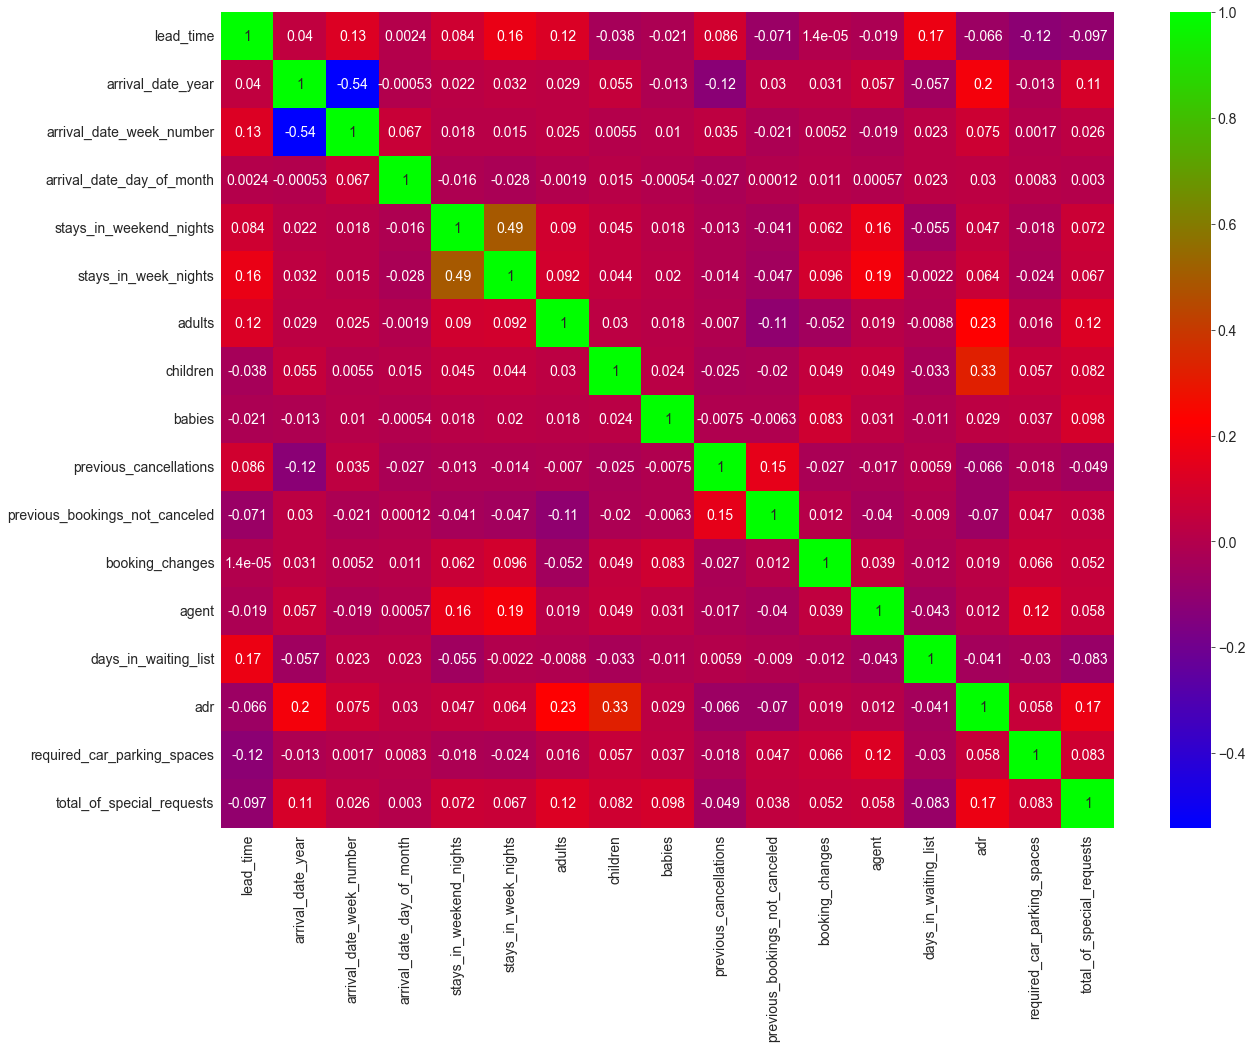

In [29]:
plt.figure(figsize=(20, 15))
sns.heatmap(og_copy_numeric, cmap="brg", annot=True)
plt.show()

As we can see, nothing is really co-related to anything as such

In [30]:
og_copy['hotel'].value_counts()

City Hotel      79306
Resort Hotel    39596
Name: hotel, dtype: int64

We can do separate analysis for city and resort hotels by splitting the data based on hotel column <br>
By doing this, we are enabled to do combined as well as dedicated analysis based on hotels

In [31]:
resort_hotel_data = og_copy[og_copy['hotel'] == 'Resort Hotel']
resort_hotel_data.shape

(39596, 32)

In [32]:
city_hotel_data = og_copy[og_copy['hotel'] == 'City Hotel']
city_hotel_data.shape

(79306, 32)

### Resort Hotel Analysis

In [33]:
resort_hotel_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,9.0,Unknown,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,9.0,Unknown,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,9.0,Unknown,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,Unknown,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,Unknown,0,Transient,98.0,0,1,Check-Out,2015-07-03


Lets see, in which month does RESORT HOTEL and CITY HOTEL generates or get bookings the most

In [55]:
resort_month_book_sum = resort_hotel_data.groupby('arrival_date_month')['adr'].sum()
resort_month_book_sum = pd.DataFrame(resort_month_book_sum)

resort_month_book_sum = resort_month_book_sum.sort_values('adr',ascending=False)
resort_month_book_sum['labels'] =  ['{:,.2f}k'.format(value/1000) for value in resort_month_book_sum.adr]


fig = go.Figure()

fig.add_trace(go.Bar(x=resort_month_book_sum.index,
                            y=resort_month_book_sum.adr,text=resort_month_book_sum.labels,
                    textposition='outside'))

fig.update_layout(
    title='Most Number of sales every month for RESORT HOTELS',
    xaxis_title='Months',
    yaxis_title='Sales')
fig.show()

### City Hotel

In [56]:
city_month_book_sum = city_hotel_data.groupby('arrival_date_month')['adr'].sum()
city_month_book_sum = pd.DataFrame(city_month_book_sum)

city_month_book_sum = city_month_book_sum.sort_values('adr',ascending=False)
city_month_book_sum['labels'] =  ['{:,.2f}k'.format(value/1000) for value in city_month_book_sum.adr]


fig = go.Figure()

fig.add_trace(go.Bar(x=city_month_book_sum.index,
                            y=city_month_book_sum.adr,text=city_month_book_sum.labels,
                    textposition='outside'))

fig.update_layout(
    title='Most Number of sales every month for CITY HOTELS',
    xaxis_title='Months',
    yaxis_title='Sales')
fig.show()

### Combined Sales


In [57]:
combined = og_copy.groupby('arrival_date_month')['adr'].sum()
combined = combined.reset_index()
combined['labels'] = ['{:,.2f}k'.format(value/1000) for value in combined.adr]
month_map = {'August': 8, 'July': 7, 'May': 5, 'June': 6, 'April': 4, 'September': 9, 'October': 10,
             'March': 3, 'February': 2, 'December': 12, 'November': 11, 'January': 1}
combined['Monthnumber'] = combined['arrival_date_month'].map(month_map)
combined = combined.sort_values('Monthnumber', ascending=True)

fig = go.Figure()

fig.add_trace(go.Bar(x=combined['arrival_date_month'], y=combined['adr'],
                     text=combined['labels'], textposition='outside'))
fig.update_layout(title={'text':'Combined Sales Per Month for RESORT and CITY HOTELS','x':0.5,'xanchor':'center'},
                  xaxis_title='Months', yaxis_title='Sales')
fig.show()

### Customer Type

In [37]:
customerType = og_copy.groupby('customer_type')['adults','children','babies'].sum()

<ipython-input-37-d938d01dac9b>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [38]:
customerType = pd.DataFrame(customerType)

In [39]:
fig = go.Figure()
for column in customerType.columns:
    fig.add_trace(go.Bar(x=customerType.index,
                         y=customerType[column], name=column, text=customerType[column]))

fig.update_layout(title='Customer Type',
                  xaxis_title='Customer Type', yaxis_title='Sum')
fig.show()

### Distribution Type

In [40]:
distribution_type = pd.DataFrame(og_copy['distribution_channel'].value_counts())
fig = go.Figure()
fig.add_trace(go.Bar(x=distribution_type.index,
                         y=distribution_type['distribution_channel'],  text=distribution_type['distribution_channel']))

fig.update_layout(title='Distribution Type',
                  xaxis_title='Distributor', yaxis_title='Counts')
fig.show()

### isCancelled?

In [41]:
isCancelled_no = og_copy[og_copy['is_canceled'] == 0]
isCancelled_yes = og_copy[og_copy['is_canceled'] == 1]
isCancelled_total = pd.DataFrame(og_copy['is_canceled'].value_counts())
isCancelled_total

,is_canceled
0,74745
1,44157


In [42]:
map_iscanceled = {0: 'Not Canceled', 1: 'Booking Canceled'}
isCancelled_total['status'] = isCancelled_total.index.map(map_iscanceled)

In [43]:
fig = go.Figure()
fig.add_trace(go.Pie(labels=isCancelled_total.status,
                     values=isCancelled_total.is_canceled))
fig.update_layout(title='Bookings Canceled or not?')
fig.update_traces(hole=0.5)
fig.show()

Lets take a look at the why bookings are getting canceled?

In [44]:
isCanceledMeans = {'Status':['Yes','No'],'Mean':[isCancelled_yes['days_in_waiting_list'].mean(),isCancelled_no['days_in_waiting_list'].mean()]}
isCanceledMeans = pd.DataFrame(isCanceledMeans)
isCanceledMeans['value'] = ['{:,.2f}'.format(value)for value in isCanceledMeans.Mean]
isCanceledMeans['value'] = pd.to_numeric(isCanceledMeans['value'])
fig = go.Figure()
fig.add_trace(go.Bar(x=isCanceledMeans.Status,
                         y=isCanceledMeans.value,  text=isCanceledMeans.value))

fig.update_layout(title='isCanceled Waiting List Mean',
                  xaxis_title='Status', yaxis_title='Mean')
fig.show()

So if we see here, if the confirmation comes within 2 days then people do not cancel their booking, but if it goes beyond 3 days, people tend to start canceling their booking. 
Hotels should focus on keeping the waiting time for confirmation within 2 days to generate maximum bookings.

## Which country has most number of bookings?

### we will display ALL countries 

In [45]:
top10_countries = pd.DataFrame(og_copy['country'].value_counts()).reset_index()
top10_countries=  top10_countries.rename(columns = {'index':'Country','country':'Count'})
top10_countries = top10_countries.sort_values('Count',ascending = False)[:175]

In [46]:
online_data = pd.read_html("https://laendercode.net/en/3-letter-list.html")
onlinedata = online_data[0]

In [58]:
onlinedata['Merged'] =  onlinedata.apply(lambda row: row['ISO 3166 ALPHA-3'] + ':' + row['Country'], axis=1)
online_data =  onlinedata.rename(columns = {'ISO 3166 ALPHA-3':'Country','Country':'FullName'})

In [48]:
merge_dict = dict(zip(onlinedata.index, onlinedata['Merged']))

In [49]:
for i in range(0,len(merge_dict)):
    merge_dict[i] = merge_dict[i].split(':')

In [52]:
countries_fullNames = top10_countries.merge(
    online_data, on='Country', how='left', indicator=True)
countries_fullNames

,Country,Count,FullName,Merged,_merge
0,PRT,48590,Portugal,PRT:Portugal,both
1,GBR,12129,United Kingdom,GBR:United Kingdom,both
2,FRA,10415,France,FRA:France,both
3,ESP,8568,Spain,ESP:Spain,both
4,DEU,7287,Germany,DEU:Germany,both
5,ITA,3766,Italy,ITA:Italy,both
6,IRL,3375,Ireland,IRL:Ireland,both
7,BEL,2342,Belgium,BEL:Belgium,both
8,BRA,2224,Brazil,BRA:Brazil,both
9,NLD,2104,Netherlands,NLD:Netherlands,both


In [59]:
countries_fullNames = countries_fullNames[['Country','Count','FullName']]

In [60]:
countries_fullNames[countries_fullNames['FullName'].isnull()]

,Country,Count,FullName
12,CN,1279,NaN
127,TMP,3,NaN


In [61]:
countries_fullNames.isna().sum()

Country     0
Count       0
FullName    2
dtype: int64

In [62]:
countries_fullNames = countries_fullNames.dropna()
countries_fullNames.reset_index()

,index,Country,Count,FullName
0,0,PRT,48590,Portugal
1,1,GBR,12129,United Kingdom
2,2,FRA,10415,France
3,3,ESP,8568,Spain
4,4,DEU,7287,Germany
5,5,ITA,3766,Italy
6,6,IRL,3375,Ireland
7,7,BEL,2342,Belgium
8,8,BRA,2224,Brazil
9,9,NLD,2104,Netherlands


### Plotting each country

In [63]:
fig = go.Figure()
fig.add_trace(go.Choropleth(
    locations= countries_fullNames['FullName'],
    z=countries_fullNames['Count'],
    locationmode='country names',
    colorscale='portland',
    autocolorscale=False,
    marker_line_color='white',
    colorbar_title='Count',
    
))
fig.update_geos(fitbounds="locations", visible=True)
fig.update_layout(
    title_text='Count by Country',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular',
    )
)

fig.show()